<a href="https://colab.research.google.com/github/sdk-bens/powerball_mega_millions_EDA/blob/comparison/PowerBall_MegaMillions_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
# PowerBall Data

# URL for downloading Powerball data as CSV
url = 'https://data.ny.gov/api/views/d6yy-54nr/rows.csv?accessType=DOWNLOAD'


response = requests.get(url)


if response.status_code == 200:
    with open('powerball.csv', 'wb') as file:
        file.write(response.content)
    print("Powerball data downloaded successfully!")
else:
    print(f"Error: {response.status_code} - {response.text}")

# Mega Millions Data

# URL for downloading Mega Millions data as CSV
url = 'https://data.ny.gov/api/views/5xaw-6ayf/rows.csv?accessType=DOWNLOAD'

response = requests.get(url)

if response.status_code == 200:
    with open('mega_millions.csv', 'wb') as file:
        file.write(response.content)
    print("Mega Millions data downloaded successfully!")
else:
    print(f"Error: {response.status_code} - {response.text}")

Powerball data downloaded successfully!
Mega Millions data downloaded successfully!


In [3]:
import pandas as pd

# Reading the .csv files
mega_millions = pd.read_csv('mega_millions.csv')
powerball = pd.read_csv('powerball.csv')

# Mega Millions EDA

In [4]:
mega_millions.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,09/25/2020,20 36 37 48 67,16,2.0
1,09/29/2020,14 39 43 44 67,19,3.0
2,10/02/2020,09 38 47 49 68,25,2.0
3,10/06/2020,15 16 18 39 59,17,3.0
4,10/09/2020,05 11 25 27 64,13,2.0


In [5]:
# Checking for null value
mega_millions.isnull().values.any()

True

In [6]:
mega_millions.isnull().sum().sum()

903

In [7]:
# Checking for null values for each column individually
for i in mega_millions.columns:
  if mega_millions[i].isnull().values.any():
    print(f"column {i} has null values")

column Multiplier has null values


In [8]:
# Replacing null values with 0 for the Multiplier column
mega_millions['Multiplier'].fillna(0, inplace=True)

<ipython-input-8-adbacbc98105>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mega_millions['Multiplier'].fillna(0, inplace=True)


In [9]:
# Dividing the winning number into 5 numbers

mega_millions['Num1'] = mega_millions['Winning Numbers'].str.split().str[0]
mega_millions['Num2'] = mega_millions['Winning Numbers'].str.split().str[1]
mega_millions['Num3'] = mega_millions['Winning Numbers'].str.split().str[2]
mega_millions['Num4'] = mega_millions['Winning Numbers'].str.split().str[3]
mega_millions['Num5'] = mega_millions['Winning Numbers'].str.split().str[4]

In [10]:
# Diving the draw date columns into Month, Day, Year

mega_millions['Month'] = mega_millions['Draw Date'].str.split("/").str[0]
mega_millions['Day'] = mega_millions['Draw Date'].str.split("/").str[1]
mega_millions['Year'] = mega_millions['Draw Date'].str.split("/").str[2]

In [11]:
mega_millions.rename(columns={'Mega Ball': 'Ball'}, inplace=True)

In [12]:
# Reordering the columns
mega_millions = mega_millions[["Month", "Day", "Year", "Num1", "Num2", "Num3", "Num4", "Num5", "Winning Numbers", "Ball", "Multiplier"]]

In [13]:
# Converting columns wiht numbers to numerical columns
def convert_to_int(df, columns=['Month', 'Day', 'Year', 'Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Ball', 'Multiplier']):
  for column in columns:
    df[column] = pd.to_numeric(df[column], errors='coerce').astype('Int64')

In [14]:
convert_to_int(mega_millions)

In [15]:
mega_millions.head()

,Month,Day,Year,Num1,Num2,Num3,Num4,Num5,Winning Numbers,Ball,Multiplier
0,9,25,2020,20,36,37,48,67,20 36 37 48 67,16,2
1,9,29,2020,14,39,43,44,67,14 39 43 44 67,19,3
2,10,2,2020,9,38,47,49,68,09 38 47 49 68,25,2
3,10,6,2020,15,16,18,39,59,15 16 18 39 59,17,3
4,10,9,2020,5,11,25,27,64,05 11 25 27 64,13,2


In [18]:
# Saving the processed MgaMillions darafmdataframerw to csv
mega_millions.to_csv('drive/MyDrive/PowerMega/processed_mega_millions.csv', index=False)

In [19]:
# Check for duplicates in the 'Winning Numbers' column
def duplicate_numbers(df, column='Winning Numbers'):
  duplicate_numbers = df[df.duplicated(subset=[column], keep=False)]
  if not duplicate_numbers.empty:
    print("Duplicate winning numbers found:")
    print(duplicate_numbers)
  else:
    print("No duplicate winning numbers found.")

In [20]:
duplicate_numbers(mega_millions)

No duplicate winning numbers found.


In [21]:
# Counting the Multiplier column values
count_multiplier_mega = mega_millions["Multiplier"].value_counts()
for number, count in count_multiplier_mega.items():
    print(f"Number: {number}, Count: {count}")

Number: 0, Count: 903
Number: 3, Count: 481
Number: 4, Count: 402
Number: 2, Count: 356
Number: 5, Count: 195


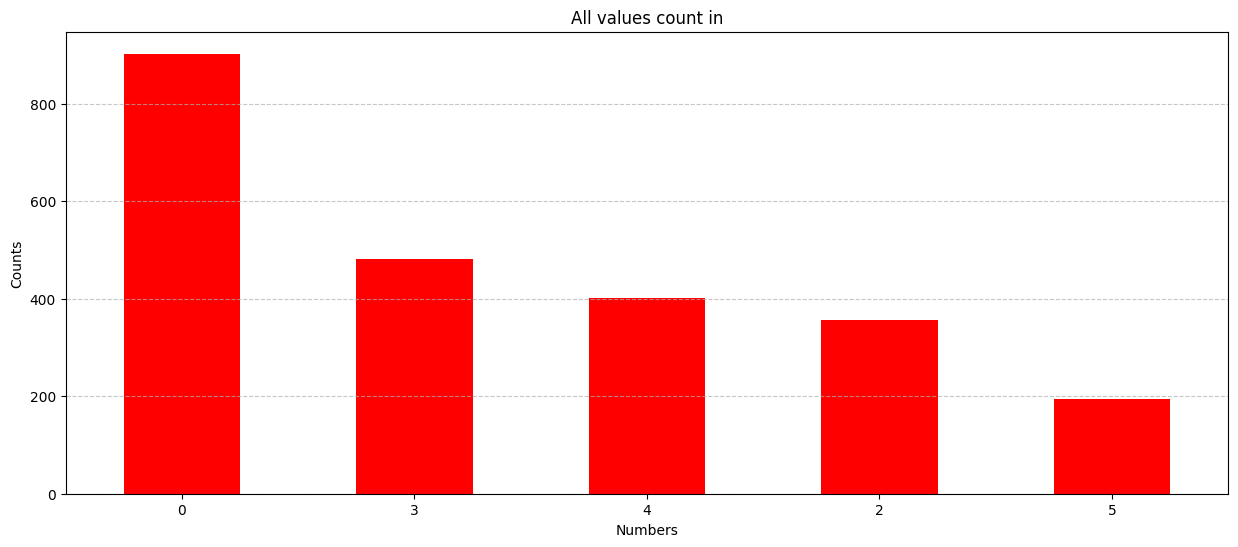

In [22]:
# Ploting the Multiplier column counts
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 6))
count_multiplier_mega.plot(kind='bar', color="red")
plt.title(f'All values count in')
plt.xlabel('Numbers')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
from matplotlib import pyplot as plt
# Counting the top n most repeated numbers
def count_most_repeated(dataframe, column, n, plot=False):
  # Validate inputs
  if column not in dataframe.columns:
      print(f"Column '{column}' does not exist in the DataFrame.")
      return

  if n <= 0:
      print("Please provide a positive integer for 'n'.")
      return

  top_n = dataframe[column].value_counts().head(n).index.tolist()
  top_n_items = dataframe[column].value_counts().head(n)
  all = dataframe[column].value_counts()
  print(f"Top {n} repeated numbers for {column} are: {top_n}")
  # Print each number and its count
  for number, count in top_n_items.items():
      print(f"Number: {number}, Count: {count}")

  if plot:
    # Create a color list based on whether the value is in the top n
    colors = ['red' if number in top_n_items.index else 'skyblue' for number in all.index]
    # Plotting the top n counts
    plt.figure(figsize=(15, 6))
    all.plot(kind='bar', color=colors)
    plt.title(f'Numbers counts in {column}')
    plt.xlabel('Numbers')
    plt.ylabel('Counts')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Top 5 repeated numbers for Num1 are: [2, 3, 1, 4, 7]
Number: 2, Count: 191
Number: 3, Count: 183
Number: 1, Count: 171
Number: 4, Count: 149
Number: 7, Count: 133


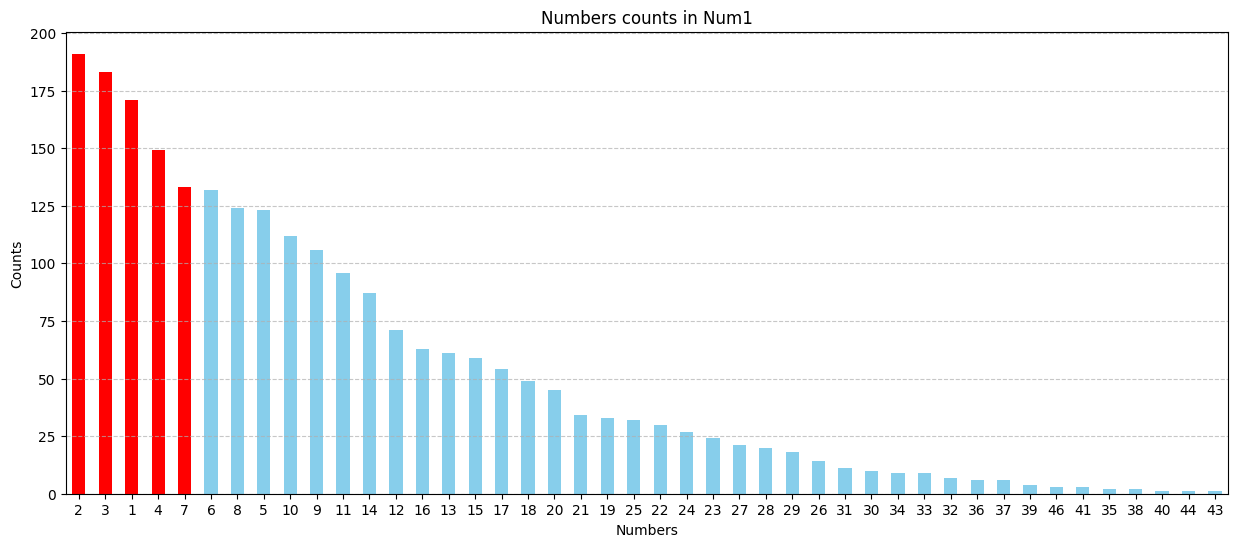

Top 5 repeated numbers for Num2 are: [17, 15, 13, 12, 10]
Number: 17, Count: 94
Number: 15, Count: 90
Number: 13, Count: 87
Number: 12, Count: 86
Number: 10, Count: 86


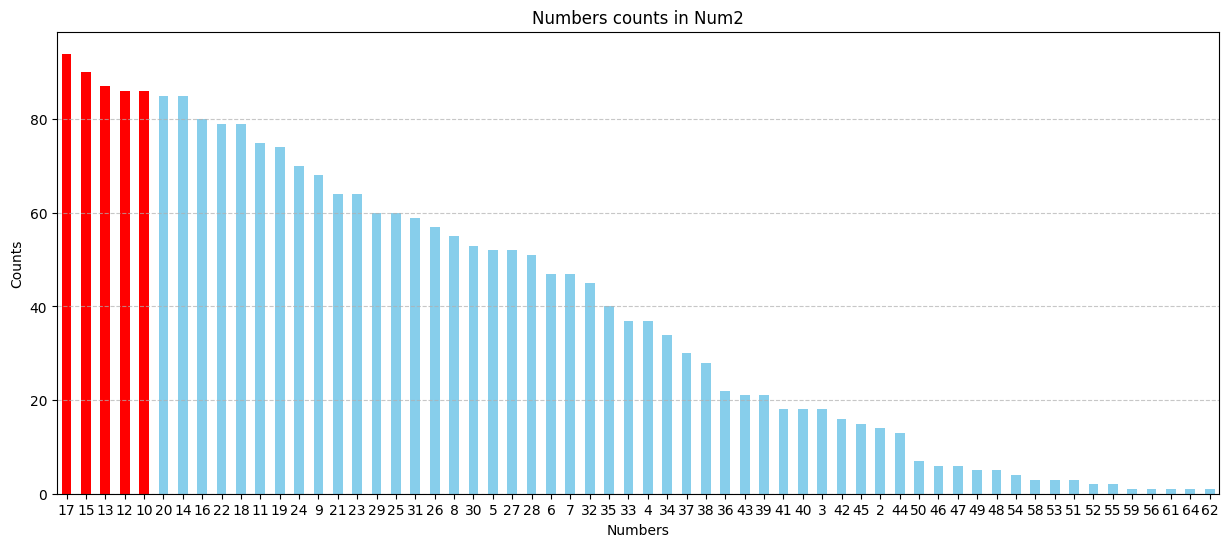

Top 5 repeated numbers for Num3 are: [31, 26, 27, 24, 29]
Number: 31, Count: 85
Number: 26, Count: 80
Number: 27, Count: 75
Number: 24, Count: 74
Number: 29, Count: 70


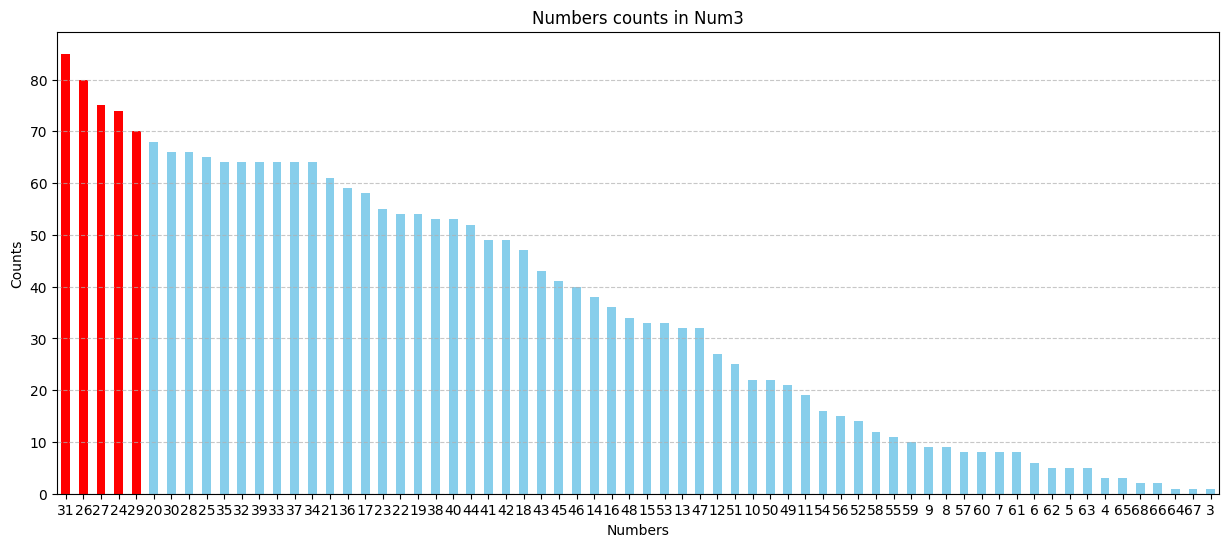

Top 5 repeated numbers for Num4 are: [46, 42, 38, 40, 48]
Number: 46, Count: 95
Number: 42, Count: 84
Number: 38, Count: 80
Number: 40, Count: 77
Number: 48, Count: 77


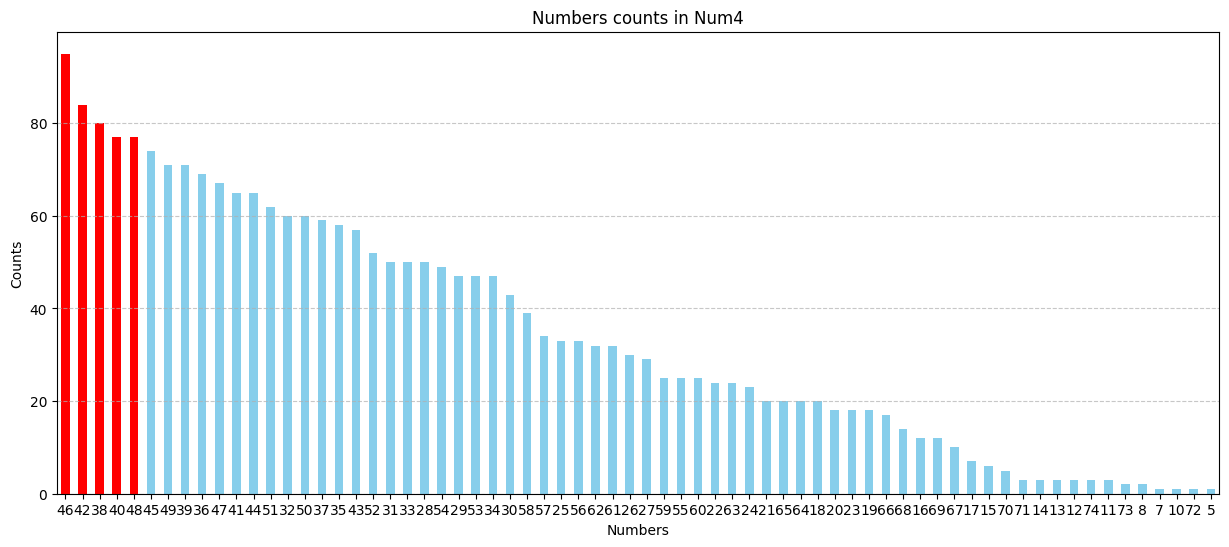

Top 5 repeated numbers for Num5 are: [52, 51, 56, 50, 55]
Number: 52, Count: 120
Number: 51, Count: 114
Number: 56, Count: 100
Number: 50, Count: 99
Number: 55, Count: 91


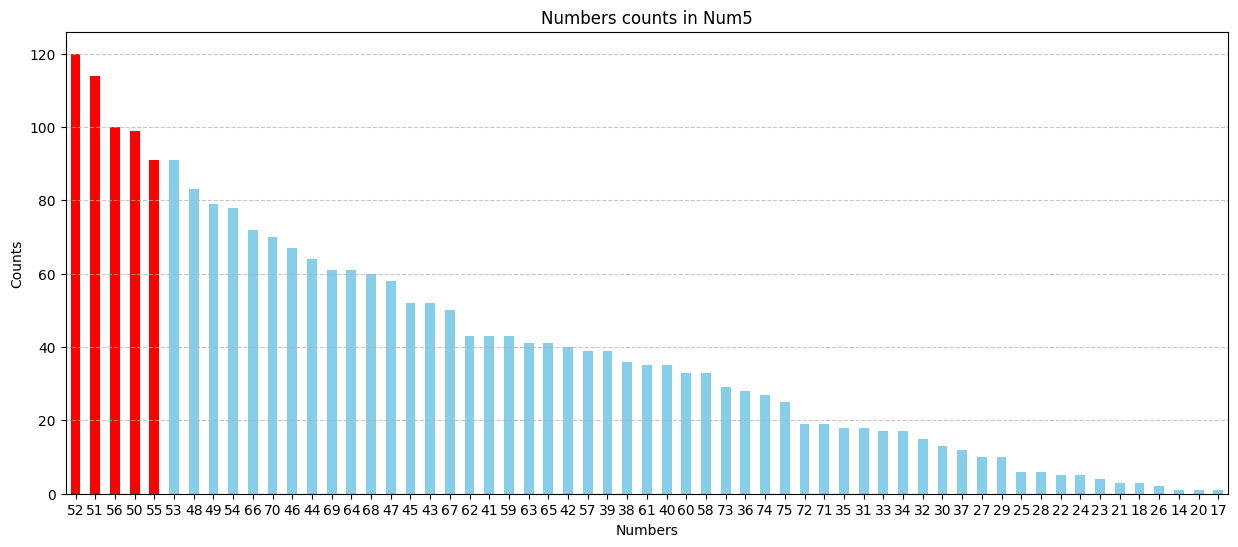

In [24]:
# Counting most repeated number only for the 5 Num columns
num_cols = [x for x in mega_millions.columns if x.startswith("Num")]
for col in num_cols:
  count_most_repeated(mega_millions, col, 5, True)

# Powerball EDA

In [25]:
powerball = pd.read_csv('powerball.csv')

In [26]:
powerball.head()

,Draw Date,Winning Numbers,Multiplier
0,09/26/2020,11 21 27 36 62 24,3.0
1,09/30/2020,14 18 36 49 67 18,2.0
2,10/03/2020,18 31 36 43 47 20,2.0
3,10/07/2020,06 24 30 53 56 19,2.0
4,10/10/2020,05 18 23 40 50 18,3.0


In [27]:
# Chekcing fir null values in each column
for i in powerball.columns:
  if powerball[i].isnull().values.any():
    print(f"column {i} has null values")

column Multiplier has null values


In [28]:
powerball['Multiplier'].fillna(0, inplace=True)

<ipython-input-28-69d6ca7d7057>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  powerball['Multiplier'].fillna(0, inplace=True)


In [29]:
powerball['Num1'] = powerball['Winning Numbers'].str.split().str[0]
powerball['Num2'] = powerball['Winning Numbers'].str.split().str[1]
powerball['Num3'] = powerball['Winning Numbers'].str.split().str[2]
powerball['Num4'] = powerball['Winning Numbers'].str.split().str[3]
powerball['Num5'] = powerball['Winning Numbers'].str.split().str[4]
powerball['Ball'] = powerball['Winning Numbers'].str.split().str[5]

In [37]:
# Removing the power ball from the winning numbers
for i in range(powerball.shape[0]):
  powerball['Winning Numbers'][i] = powerball['Winning Numbers'][i][:14]

<ipython-input-37-b4a406fab68e>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  powerball['Winning Numbers'][i] = powerball['Winning Numbers'][i][:14]
<ipython-input-37-b4a406fab68e>:3: SettingWithCopyWarning: 
A value is trying to be set o

In [31]:
# Diving the draw date columns into Month, Day, Year

powerball['Month'] = powerball['Draw Date'].str.split("/").str[0]
powerball['Day'] = powerball['Draw Date'].str.split("/").str[1]
powerball['Year'] = powerball['Draw Date'].str.split("/").str[2]

In [32]:
# Reordering the columns
powerball = powerball[["Month", "Day", "Year", "Num1", "Num2", "Num3", "Num4", "Num5", "Winning Numbers", "Ball", "Multiplier"]]

In [38]:
powerball.head()

,Month,Day,Year,Num1,Num2,Num3,Num4,Num5,Winning Numbers,Ball,Multiplier
0,9,26,2020,11,21,27,36,62,11 21 27 36 62,24,3
1,9,30,2020,14,18,36,49,67,14 18 36 49 67,18,2
2,10,3,2020,18,31,36,43,47,18 31 36 43 47,20,2
3,10,7,2020,6,24,30,53,56,06 24 30 53 56,19,2
4,10,10,2020,5,18,23,40,50,05 18 23 40 50,18,3


In [34]:
convert_to_int(powerball)

In [35]:
powerball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Month            1693 non-null   Int64 
 1   Day              1693 non-null   Int64 
 2   Year             1693 non-null   Int64 
 3   Num1             1693 non-null   Int64 
 4   Num2             1693 non-null   Int64 
 5   Num3             1693 non-null   Int64 
 6   Num4             1693 non-null   Int64 
 7   Num5             1693 non-null   Int64 
 8   Winning Numbers  1693 non-null   object
 9   Ball             1693 non-null   Int64 
 10  Multiplier       1693 non-null   Int64 
dtypes: Int64(10), object(1)
memory usage: 162.2+ KB


In [36]:
duplicate_numbers(powerball)

No duplicate winning numbers found.


In [40]:
# Saving the processed MgaMillions darafmdataframerw to csv
mega_millions.to_csv('drive/MyDrive/PowerMega/processed_powerball.csv', index=False)

In [39]:
num_cols = [x for x in powerball.columns if x.startswith("Num")]
for col in num_cols:
  count_most_repeated(powerball, col, 7)

Top 7 repeated numbers for Num1 are: [1, 2, 3, 5, 4, 6, 7]
Number: 1, Count: 128
Number: 2, Count: 117
Number: 3, Count: 112
Number: 5, Count: 104
Number: 4, Count: 97
Number: 6, Count: 81
Number: 7, Count: 81
Top 7 repeated numbers for Num2 are: [12, 21, 28, 15, 20, 23, 10]
Number: 12, Count: 64
Number: 21, Count: 63
Number: 28, Count: 59
Number: 15, Count: 56
Number: 20, Count: 54
Number: 23, Count: 54
Number: 10, Count: 54
Top 7 repeated numbers for Num3 are: [37, 33, 35, 39, 32, 36, 34]
Number: 37, Count: 58
Number: 33, Count: 58
Number: 35, Count: 55
Number: 39, Count: 55
Number: 32, Count: 51
Number: 36, Count: 51
Number: 34, Count: 51
Top 7 repeated numbers for Num4 are: [53, 52, 47, 45, 39, 46, 55]
Number: 53, Count: 61
Number: 52, Count: 59
Number: 47, Count: 59
Number: 45, Count: 57
Number: 39, Count: 56
Number: 46, Count: 56
Number: 55, Count: 55
Top 7 repeated numbers for Num5 are: [69, 59, 58, 68, 67, 57, 56]
Number: 69, Count: 98
Number: 59, Count: 90
Number: 58, Count: 8

In [41]:
count_multiplier_power = powerball["Multiplier"].value_counts()
for number, count in count_multiplier_power.items():
    print(f"Number: {number}, Count: {count}")

Number: 2, Count: 768
Number: 3, Count: 453
Number: 0, Count: 210
Number: 4, Count: 142
Number: 5, Count: 104
Number: 10, Count: 16


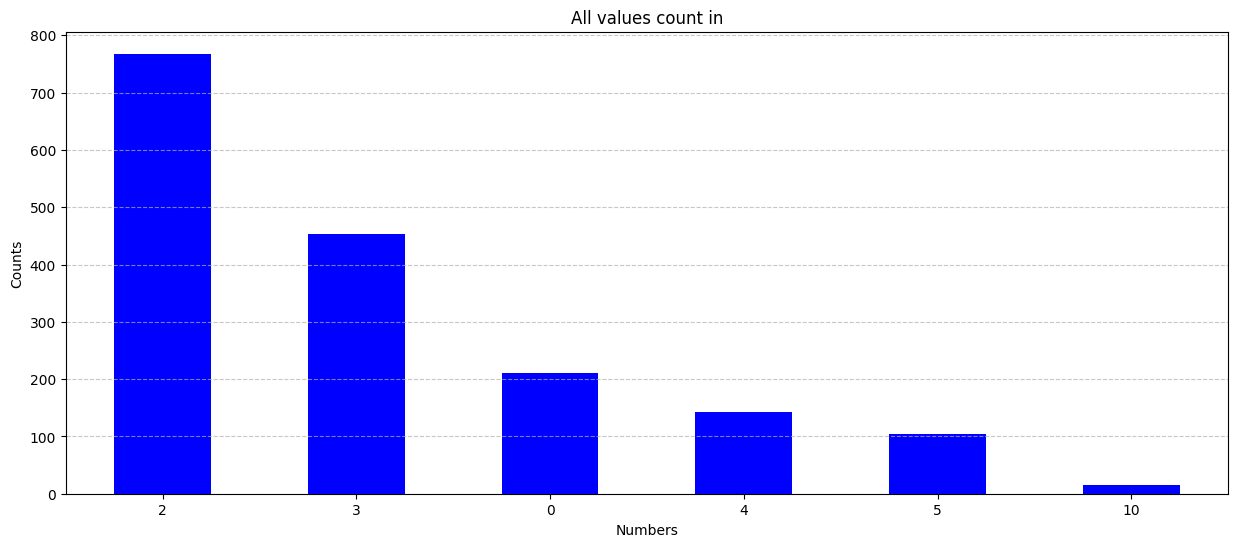

In [42]:
plt.figure(figsize=(15, 6))
count_multiplier_power.plot(kind='bar', color="blue")
plt.title(f'All values count in')
plt.xlabel('Numbers')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [43]:
def top_n_percent(dataframe, column, n):
  top_n_items = dataframe[column].value_counts().head(n)
  total = 0
  for number, count in top_n_items.items():
    total += count
  percent = round((total / dataframe.shape[0] ) * 100)
  print(f"percentage of top {n} number in {i} is: {percent} %")


# MegaMillions vs PowerBall top Winning numbers

In [44]:
cols = ['Num1', 'Num2', 'Num3', 'Num4', 'Num5']
n = 5
print("PowerBall")
for i in cols:
  top_n_percent(powerball, i, n)

print(43*"*")
print("MegaMillions")
for i in cols:
  top_n_percent(mega_millions, i, n)


PowerBall
percentage of top 5 number in Num1 is: 33 %
percentage of top 5 number in Num2 is: 17 %
percentage of top 5 number in Num3 is: 16 %
percentage of top 5 number in Num4 is: 17 %
percentage of top 5 number in Num5 is: 25 %
*******************************************
MegaMillions
percentage of top 5 number in Num1 is: 35 %
percentage of top 5 number in Num2 is: 19 %
percentage of top 5 number in Num3 is: 16 %
percentage of top 5 number in Num4 is: 18 %
percentage of top 5 number in Num5 is: 22 %


In [56]:
for col in cols:
  print(f"For {col} in PowerBall")
  count_most_repeated(powerball, col, 3)
  print(f"\nFor {col} in MegaMillions")
  count_most_repeated(mega_millions, col, 3)
  print(43*"*")

For Num1 in PowerBall
Top 3 repeated numbers for Num1 are: [1, 2, 3]
Number: 1, Count: 128
Number: 2, Count: 117
Number: 3, Count: 112

For Num1 in MegaMillions
Top 3 repeated numbers for Num1 are: [2, 3, 1]
Number: 2, Count: 191
Number: 3, Count: 183
Number: 1, Count: 171
*******************************************
For Num2 in PowerBall
Top 3 repeated numbers for Num2 are: [12, 21, 28]
Number: 12, Count: 64
Number: 21, Count: 63
Number: 28, Count: 59

For Num2 in MegaMillions
Top 3 repeated numbers for Num2 are: [17, 15, 13]
Number: 17, Count: 94
Number: 15, Count: 90
Number: 13, Count: 87
*******************************************
For Num3 in PowerBall
Top 3 repeated numbers for Num3 are: [37, 33, 35]
Number: 37, Count: 58
Number: 33, Count: 58
Number: 35, Count: 55

For Num3 in MegaMillions
Top 3 repeated numbers for Num3 are: [31, 26, 27]
Number: 31, Count: 85
Number: 26, Count: 80
Number: 27, Count: 75
*******************************************
For Num4 in PowerBall
Top 3 repeat

## We can see that numbers gets repeated more often in the **MegaMillions** compard to th **Powerball**

In [53]:
prime = 0
odd = 0
for i in range(powerball.shape[0]):
  if powerball['Month'].iloc[i] %2 == 0:
    if powerball['Day'].iloc[i] %2 == 0:
      if powerball['Year'].iloc[i] %2 == 0:
        if powerball['Num2'][i] %2 == 0:
          prime += 1
  else:
    if powerball['Day'].iloc[i] %2 != 0:
      if powerball['Year'].iloc[i] %2 != 0:
        if powerball['Num2'][i] %2 != 0:
          odd += 1
print(prime)
print(odd)

114
102
